In [ ]:
# 1) 한글 폰트 설치 (Nanum + Noto CJK KR 백업)
!apt-get update -qq
!apt-get install -y fonts-nanum fonts-noto-cjk > /dev/null

# 2) Matplotlib에 폰트 즉시 등록(재시작 불필요) + 전역 설정
import os, glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 설치된 폰트 경로에서 ttf/otf 파일을 찾아 등록
font_dirs = [
    "/usr/share/fonts/truetype/nanum",
    "/usr/share/fonts/opentype/noto",
    "/usr/share/fonts/noto",
]
font_files = []
for d in font_dirs:
    if os.path.isdir(d):
        font_files += glob.glob(os.path.join(d, "**", "*.ttf"), recursive=True)
        font_files += glob.glob(os.path.join(d, "**", "*.otf"), recursive=True)

for f in font_files:
    try:
        fm.fontManager.addfont(f)
    except Exception:
        pass  # 읽지 못하는 폰트 파일은 건너뜀

# 선호 순서대로 사용할 폰트 이름 선택
preferred = [
    "NanumBarunGothic",  # 있으면 이걸 최우선
    "NanumGothic",
    "Noto Sans CJK KR",
    "Noto Sans KR",
    "NanumMyeongjo",
]
available = {f.name for f in fm.fontManager.ttflist}
font_name = next((name for name in preferred if name in available), None)

if font_name is None:
    raise RuntimeError("Korean font not found — 설치가 실패했을 수 있어요.")

mpl.rcParams["font.family"] = font_name
mpl.rcParams["axes.unicode_minus"] = False
print("Using font:", font_name)


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os, re
from glob import glob
from tqdm import tqdm
import time
import matplotlib as mpl
import matplotlib.pyplot as plt

# **https://bigvalue.ai**

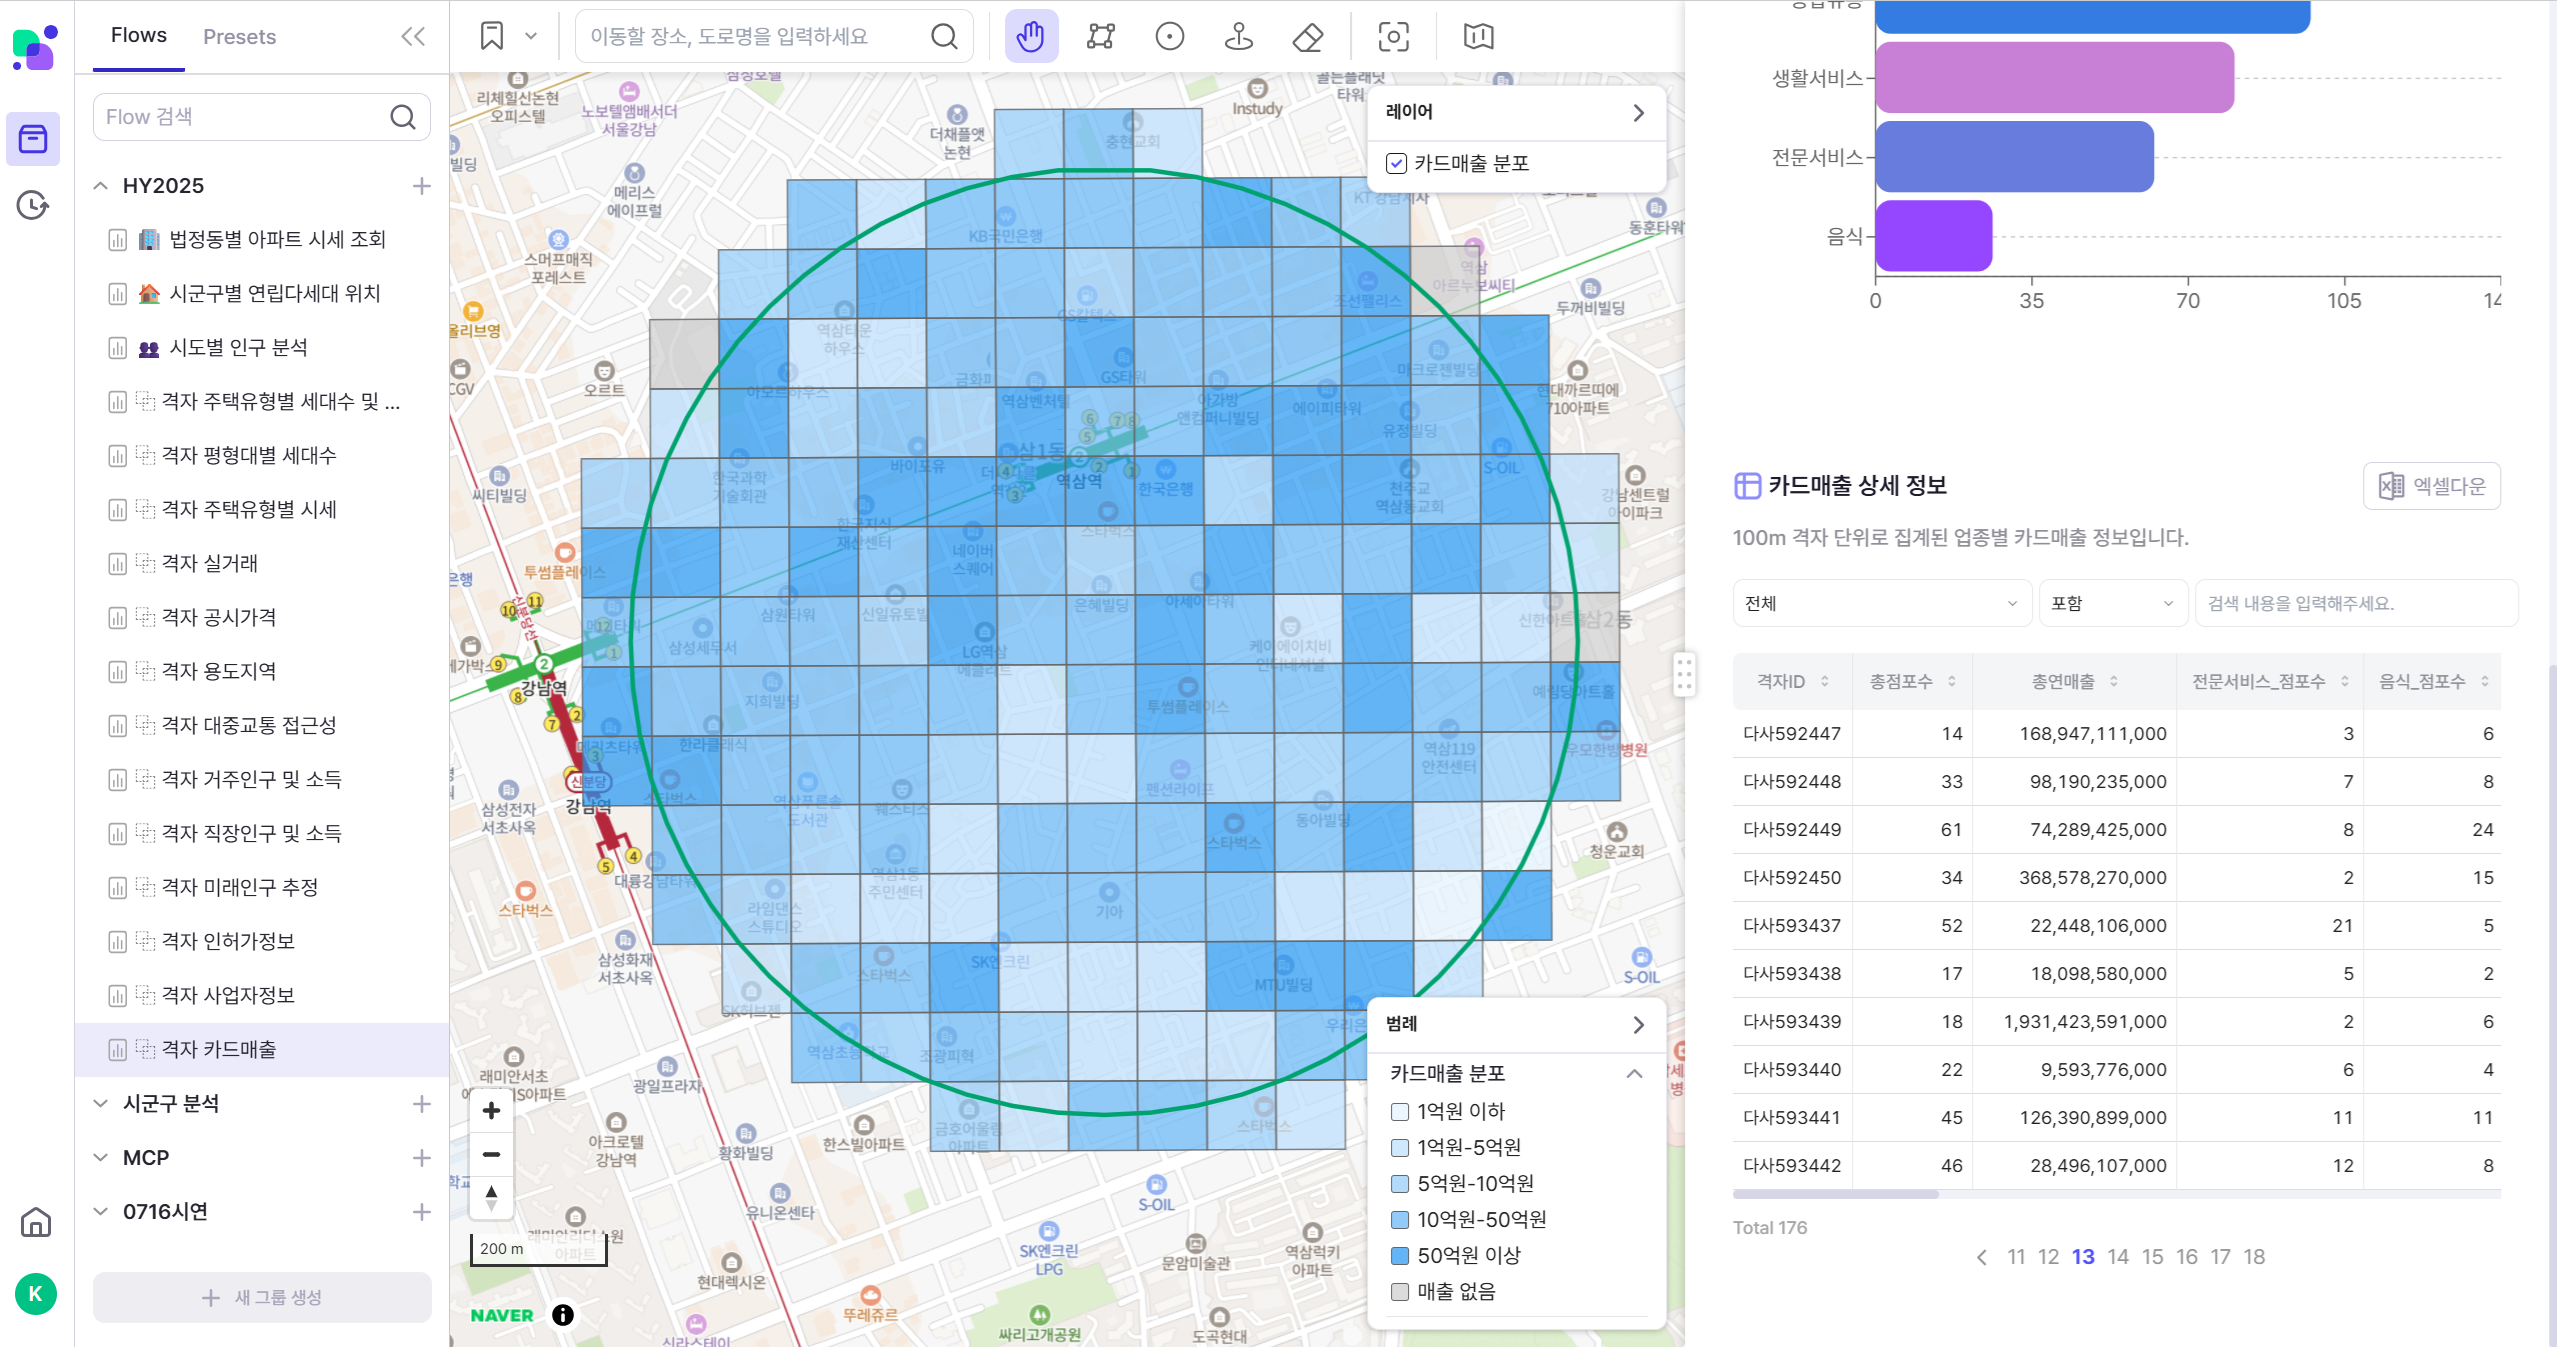

In [ ]:
# #데이터 다운로드
# !wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=68d7798658349" -O "house.xlsx"
# !wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=68d7799733f31" -O "job.xlsx"
# !wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=68d779a46fc92" -O "sales.xlsx"


In [ ]:
house_data = pd.read_excel('house.xlsx')
job_data = pd.read_excel('job.xlsx')
sales_data = pd.read_excel('sales.xlsx')

house_data.head(5)

In [ ]:
data = pd.merge(sales_data, house_data, on='격자ID')
data = pd.merge(data, job_data, on='격자ID')

data.head(5)

In [ ]:
data.columns

In [ ]:
data[['총연매출','전문서비스_평균연매출', '음식_평균연매출', '일반유통_평균연매출',
      '생활서비스_평균연매출', '문화레져_평균연매출', '종합유통_평균연매출', '전체_평균연매출']].dtypes

In [ ]:
cols = ['총연매출','전문서비스_평균연매출', '음식_평균연매출', '일반유통_평균연매출',
      '생활서비스_평균연매출', '문화레져_평균연매출', '종합유통_평균연매출', '전체_평균연매출']

for col in cols :
  data[col] = data[col].apply(lambda x : int(x.replace(',', '')))

data[['총연매출','전문서비스_평균연매출', '음식_평균연매출', '일반유통_평균연매출',
      '생활서비스_평균연매출', '문화레져_평균연매출', '종합유통_평균연매출', '전체_평균연매출']].dtypes

In [ ]:
data['총연매출'].describe()

In [ ]:
data[data['총연매출'] < 10000000000]['총연매출'].hist(bins=10)

In [ ]:
data['총연매출'].median()

In [ ]:
data['종속'] = data['총연매출'].apply(lambda x : 1 if x > 40000000000 else 0)

In [ ]:
data['종속'].value_counts()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define independent and dependent variables
y_label = '종속'
X_labels = ['총인구수', '남성인구', '여성인구', '거주인구추정소득(백만원)', '0-4세', '5-9세', '10-14세', '15-19세', '20-24세', '25-29세', '30-34세', '35-39세', '40-44세', '45-49세', '50-54세', '55-59세', '60-64세', '65-69세', '70-74세', '75-79세', '80-84세', '85-89세', '90-94세', '95-99세', '100세이상', '총직장인구수', '직장인구추정소득(백만원)', '농업·임업·어업', '광업', '제조업', '전기·가스·증기·수도업', '하수·폐기·재생·복원업', '건설업', '도매·소매업', '운수업', '숙박·음식업', '출판·영상·통신·서비스업', '금융·보험업', '부동산·임대업', '전문·과학·기술서비스업', '시설관리·지원서비스업', '공공·국방·사회보장업', '교육서비스업', '보건·사회복지서비스업', '예술·스포츠·여가관련업', '협회·단체·수리·기타업', '국제·외국기관', '기타']

# Create numpy arrays
X = data[X_labels].fillna(0).values
y = data[y_label].values.reshape(-1, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

In [ ]:
# Create scatter plot
plt.figure(figsize=(10, 6))

# Filter data for plotting
data_high_temp = data[data['종속'] == 1]
data_low_temp = data[data['종속'] == 0]

plt.scatter(data_high_temp['총인구수'], data_high_temp['총직장인구수'], color='red', label='종속=1 (High)', alpha=0.6)
plt.scatter(data_low_temp['총인구수'], data_low_temp['총직장인구수'], color='blue', label='종속=0 (Low)', alpha=0.6)

plt.xlabel('총인구수 (Total Population)')
plt.ylabel('총직장인구수 (Total Working Population)')
plt.title('Scatter plot of Total Population vs Total Working Population colored by 종속')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create and train the Decision Tree Classifier on the entire dataset
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X, y)

# Make predictions on the entire dataset
y_pred = dt_model.predict(X)

# Calculate Confusion Matrix
cm = confusion_matrix(y, y_pred)

# Display Confusion Matrix as a DataFrame
cm_df = pd.DataFrame(cm,
                     index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(cm_df)

# Calculate and print Metrics
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("\nMetrics (Decision Tree):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import pandas as pd

# Create and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y.ravel()) # ravel() is used to flatten y

# Make predictions on the entire dataset
y_pred_rf = rf_model.predict(X)

# Calculate Confusion Matrix
cm_rf = confusion_matrix(y, y_pred_rf)

# Display Confusion Matrix as a DataFrame
cm_df_rf = pd.DataFrame(cm_rf,
                        index=['Actual Negative', 'Actual Positive'],
                        columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix (Random Forest):")
print(cm_df_rf)

# Calculate and print Metrics
accuracy_rf = accuracy_score(y, y_pred_rf)
precision_rf = precision_score(y, y_pred_rf)
recall_rf = recall_score(y, y_pred_rf)
f1_rf = f1_score(y, y_pred_rf)

print("\nMetrics (Random Forest):")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

In [ ]:
X.shape

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization

model = keras.Sequential([
    BatchNormalization(input_shape=(X.shape[1],)), # Input layer normalization
    layers.Dense(220, activation='relu'),
    layers.Dense(440, activation='relu'),
    layers.Dense(220, activation='relu'),
    layers.Dense(110, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(X, y, epochs=100)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(history.history['accuracy'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Loss', color=color)  # we already handled the x-label with ax1
ax2.plot(history.history['loss'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Model accuracy and loss')
plt.show()

In [ ]:
y_predict = model.predict(X)


In [ ]:
# prompt: y_predict 분포 출력

import matplotlib.pyplot as plt

plt.hist(y_predict, bins=20)
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.title('Distribution of y_predict')
plt.show()


In [ ]:
# prompt: y_predict가 0.5 보다 작으면 0으로 0.5보다 크면 1로 변경

y_predict_binary = [0 if val < 0.5 else 1 for val in y_predict]

In [ ]:
# prompt: y_predict_binary와 y를 비교해서 true false positive negative 테이블을 표 모양으로 생성하고, precision, recall, accuracy, f1score를 출력

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Confusion Matrix 계산
cm = confusion_matrix(y, y_predict_binary)

# DataFrame으로 표 형태로 만들기
cm_df = pd.DataFrame(cm,
                     index=['Actual Negative', 'Actual Positive'],
                     columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(cm_df)

# Precision, Recall, Accuracy, F1-Score 계산
precision = precision_score(y, y_predict_binary)
recall = recall_score(y, y_predict_binary)
accuracy = accuracy_score(y, y_predict_binary)
f1 = f1_score(y, y_predict_binary)

print("\nMetrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")


In [ ]:
plt.figure(figsize=(10, 6))

# Iterate through the data points
for i in range(len(y)):
    # Determine color based on actual value
    color = 'red' if y[i] == 1 else 'blue'

    # Determine marker based on whether prediction was correct
    marker = 'o' if y[i] == y_predict_binary[i] else 'x'

    # Plot the point
    plt.scatter(X[i, X_labels.index('총인구수')], X[i, X_labels.index('총직장인구수')],
                color=color, marker=marker, alpha=0.6)

# Add labels and title
plt.xlabel('총인구수 (Total Population)')
plt.ylabel('총직장인구수 (Total Working Population)')
plt.title('Scatter plot of Total Population vs Total Working Population with Prediction Results')

# Create custom legend handles
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Correct Prediction (Actual 1)', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='x', color='w', label='Incorrect Prediction (Actual 1)', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Correct Prediction (Actual 0)', markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='x', color='w', label='Incorrect Prediction (Actual 0)', markerfacecolor='blue', markersize=10)]

plt.legend(handles=legend_elements, loc='upper right')


plt.grid(True)
plt.show()